> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [6]:
import csv 
import pandas as py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd
import csv

tmdb_data = pd.read_csv('tmdb-movies.csv')
tmdb_data.head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning:

1- remove unnecessary columns to make it easier.
list of unused columns [ 'id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

2- remove duplicated data

3- remove the null value in imdb_id, budget and runtime column

4- replacing 0 values with NaN. 

5- change the data type of release_date to datetime

6- insert new column " profit"

In [8]:
#remove duplicated data

tmdb_data.drop_duplicates(keep='first' , inplace=True)

In [9]:
#check
sum(tmdb_data.duplicated())

0

In [10]:
#explor the data issues
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [11]:
#find null values
tmdb_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
#drop null values and check
tmdb_data.dropna(subset=['imdb_id','budget','runtime'], inplace=True)  
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [13]:
#list the unnecessary columns that needs to be deleted

del_col=[ 'id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#then deleting the columns
tmdb_data= tmdb_data.drop(del_col,1)

#show the new dataset
tmdb_data.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


In [14]:
#replacing 0 with NaN at 'runtime' column

tmdb_data['runtime'] = tmdb_data['runtime'].replace(0, np.NaN)

#replacing 0 with NaN at 'budget' column

tmdb_data['budget'] = tmdb_data['budget'].replace(0, np.NaN)

#replacing 0 with NaN at 'revenue' column

tmdb_data['revenue'] = tmdb_data['revenue'].replace(0, np.NaN)

In [15]:
#check all the data type
tmdb_data.dtypes

imdb_id            object
popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime           float64
genres             object
release_date       object
release_year        int64
dtype: object

In [16]:
#change the data type of release_date to datetime

tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [17]:
#check the data type to make sure
tmdb_data.dtypes

imdb_id                   object
popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

To be accurate in our calculation we should have to insert a PROFIT column in the data set
which is the difference between revenue and budget =(revenue-budget)

In [18]:
#insert the new value
tmdb_data.insert(4,'profit',tmdb_data['revenue'] - tmdb_data['budget'])
#show the dataset
tmdb_data.head(1)

,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1 (Comparing) - Find the most and least values.

a1-Which movies had the most and least profit?

b1-Which moives had the highest and lowest budget?

c1-Which moives had the most and least runtime?

Q1-a:

Which movies had the most and least profit?

In [19]:
#define a function to calculates the highest and lowest profit

def high_low(column_name):
    
    #the highest profit
   
    highest_id = tmdb_data[column_name].idxmax()
    highest_details = pd.DataFrame(tmdb_data.loc[highest_id])
    
    #the lowest profit
   
    lowest_id = tmdb_data[column_name].idxmin()
    lowest_details = pd.DataFrame(tmdb_data.loc[lowest_id])
    
    #to Concatenate pandas objects along a particular axis
   
    highest_lowest_value = pd.concat([highest_details, lowest_details], axis = 1)
    
    return highest_lowest_value

high_low('profit')

,1386,2244
imdb_id,tt0499549,tt1032751
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
profit,2.54451e+09,-4.13912e+08
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100


The data set above show Avatar movie has the highest profit ever which is 2,5 billion.
the film broke several box office records and became the highest-grossing film of all time, It also became the first film to gross more than $2 billion, which explains why they decided to  
following this success by produce four sequels: Avatar 2 and Avatar 3.
And the lowest profit movie goes to " The Warrior's Way" which going in loss about 400 millions.

Q1-b: Which moives had the highest and lowest budget?

In [20]:
high_low('budget')

,2244,1151
imdb_id,tt1032751,tt2165765
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,1.10876e+07,NaN
profit,-4.13912e+08,NaN
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
tagline,Assassin. Hero. Legend.,NaN
runtime,100,95


Wow this one shocked me..
the biggest budget in our dataset gose to The Warrior's Way movie the one that return a highest loss also!! 
At the oppesit with Fear clinic moive the spent nothing on it and I mean by nothing is 1 $.

Obviously the biggest budget doesn't necessarily mean big profit in movies industry.

Q1-c: Which moives had the most and least runtime?

In [21]:
high_low('runtime')

,3894,4883
imdb_id,tt2044056,tt2309977
popularity,0.006925,0.078472
budget,NaN,NaN
revenue,NaN,NaN
profit,NaN,NaN
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
tagline,NaN,NaN
runtime,900,2


The Story of Film: An Odyssey is a documentary film about the history of film, presented on TV with a total length of over 900 minutes. 
On the other hand, the 2 mins Fresh Guacamole is the shortest film ever nominated for an Academy Award.

# Research Question 2 

2a- What the average runtime on all the movies on the data set? (with visualization)

2b- What is the moives top cast and dirictors that associated with popularity?

Q2-c) Which are the most genres of moives (with visualization)

Q2- )How many numbers of moives are released each year? (with visualization)


Q2-a) What the average runtime on all the movies on the data set?

In [21]:
#define funcation to calculate the average

def average_function(column_name):
     return tmdb_data[column_name].mean()

In [22]:
#show the average runtime
a = average_function('runtime')
print("the average runtim of all the movies in the dataset by minutes is ", a )

the average runtim of all the movies in the dataset by minutes is  102.397634885


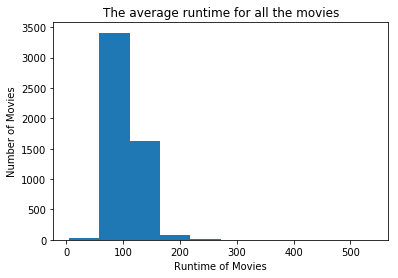

In [26]:
#make plot of runtime distribution 

#figure size and names
plt.xlabel('Runtime of Movies')
plt.ylabel('Number of Movies')
plt.title('The average runtime for all the movies')
plt.hist(tmdb_data['runtime'])
plt.show()

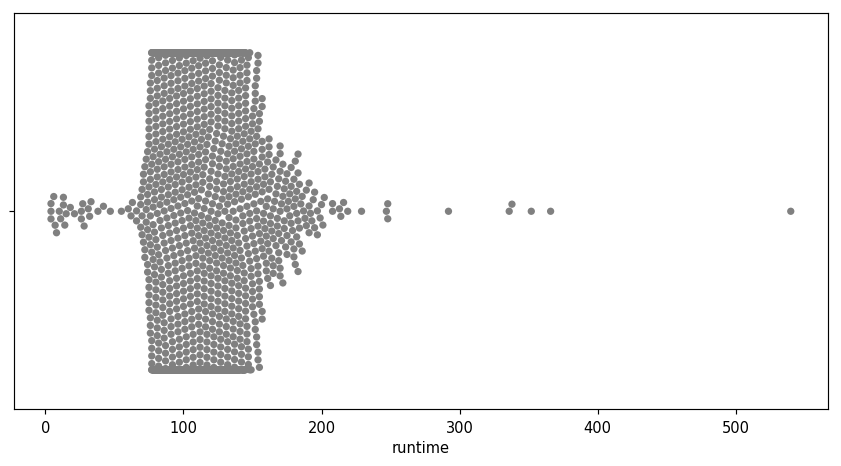

In [29]:
import seaborn as sns

plt.figure(figsize=(10,5), dpi = 105)

sns.swarmplot(tmdb_data['runtime'], color = 'grey')
plt.show()

In [28]:
#Generates descriptive statistics, dispersion and shape of a dataset’s distribution

tmdb_data['runtime'].describe()

count    5165.000000
mean      107.177735
std        22.629423
min         4.000000
25%        93.000000
50%       103.000000
75%       117.000000
max       540.000000
Name: runtime, dtype: float64

The plot and the informations above gave us a complete idea about how the distribution of the average runtime works among many movies.

25% of moives have 93 mins runtime and 50% of moives have 103 mins runtime while the most common runtime of moive which 75% have 117 mins.

Q2-b)Find the average budget spent on all movies?

In [36]:
#def average fun again to calculta the average budget
def average_function(column_name):
     return tmdb_data[column_name].mean()

In [37]:
#show the average budget
b = average_function('budget')
print("the average budget spent on all of the movies in the dataset by million is ", b )

the average budget spent on all of the movies in the dataset by million is  30761203.7926


2b- What is the moives top cast and dirictors that associated with popularity?


In [22]:
#define fun to determine the top moives in the dataset

def find_top(dataframe_col, num=3):
    
    #make a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    #make dataframe
    new = pd.DataFrame({'top' :alist})
    #count the appear times and choose 3
    top = new['top'].value_counts().head(num)
    return top

In [31]:
#find the top 100 movies

#sort by year in asc. and by popularity desc.
tmdb_data_top_p = tmdb_data.sort_values(['release_year','popularity'], ascending=[True, False])
#group by year then choose the top 100 high
tmdb_data_top_p = tmdb_data_top_p.groupby('release_year').head(100).reset_index(drop=True)
#check
tmdb_data_top_p.head()


,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,tt0054215,2.610362,806948.0,32000000.0,31193052.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,109.0,Drama|Horror|Thriller,2060-08-14,1960
1,tt0054047,1.872132,2000000.0,4905000.0,2905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,128.0,Action|Adventure|Western,2060-10-23,1960
2,tt0054331,1.136943,12000000.0,60000000.0,48000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,197.0,Action|Drama|History,2060-10-06,1960
3,tt0053604,0.947307,3000000.0,25000000.0,22000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",125.0,Comedy|Drama|Romance,2060-06-15,1960
4,tt0054022,0.875173,NaN,NaN,NaN,Let's Make Love,Marilyn Monroe|Yves Montand|Tony Randall|Frank...,George Cukor,MARILYN MONROE and YVES MONTAND the French ent...,114.0,Comedy|Romance,2060-10-07,1960


It's seems that  properties that are associated with high popularity movies, were the high budget levels and long runtime.


In [24]:
#Now let's find the 3 top from the cast, dirctor and genres
#cast
a = find_top(tmdb_data_top_p.cast)
#director
b = find_top(tmdb_data_top_p.director)

In [25]:
#create dataframe

tmdb_data_popular = pd.DataFrame({'popular_cast': a.index ,'popular_director' : b.index})
tmdb_data_popular

,popular_cast,popular_director
0,Robert De Niro,Woody Allen
1,Bruce Willis,Steven Spielberg
2,Nicolas Cage,Martin Scorsese


I was not suprised by this result, the actress "Robert De Niro" had almost 127 movies and alot of them are a popular. On the other hand, the dirctor Woody Allen who's directer about 53 movies and recived a lot of prizes among his many competitive awards, he has won four Academy Awards, ten BAFTA awards, two Golden Globe Awards and won three Oscars. Also, the popular director Steven Spielberg who owned many awards for his good movies. 

Q2-c) Which are the most genres of moives (with visulaization)

In [32]:
#define extract fun.
def extract_data(column_name):
    #separate the string by '|'
    all_data = tmdb_data[column_name].str.cat(sep = '|')
    
    #place pandas series and stor values separate 
    all_data = pd.Series(all_data.split('|'))
    
    #order the values desc.
    count = all_data.value_counts(ascending = False)
    
    return count

In [27]:
#shwoing the top 5 values
genre_count = extract_data('genres')
genre_count.head()

Drama       4758
Comedy      3792
Thriller    2907
Action      2379
Romance     1712
dtype: int64

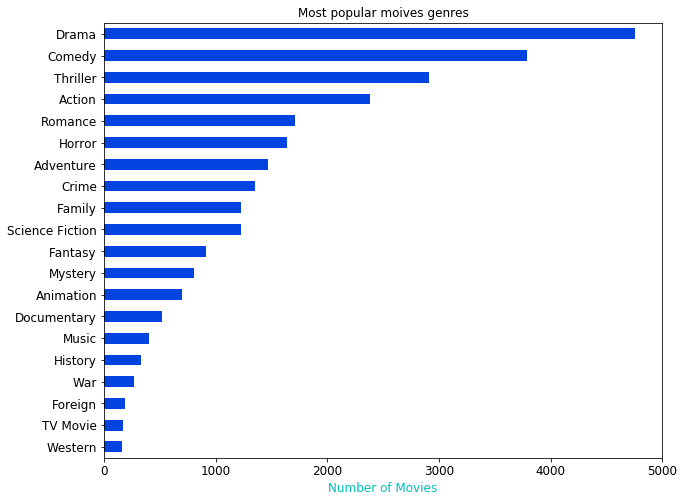

In [28]:
#make a plot order from top to bottom

genre_count.sort_values(ascending = True, inplace = True)

ax = genre_count.plot.barh(color = '#0343DF', fontsize = 12)

#giving a title
ax.set(title = 'Most popular moives genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'c', fontsize = '12')

#giving the figure size(width, height)
ax.figure.set_size_inches(10, 8)
#shwoing the plot
plt.show()


Yes..my favorite movie types Drama and comdey are the winner here.. 
It is our human nature to be drawn into a strong dramatic story. There are really only two types of stories:drama and comedy,Both are reflections of our life; and watching action or thriller movies it is just to add some spices to it.

Q2-d )How many numbers of moives are released each year? (with visualization)

In [29]:
movie_count = tmdb_data.groupby('release_year').count()['imdb_id']
movie_count.head(10)


release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    40
1968    39
1969    31
Name: imdb_id, dtype: int64

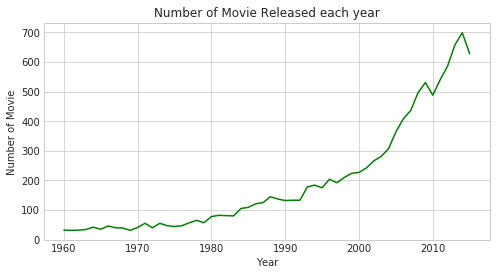

In [30]:
#make plot line chart

#detrmine the style
sns.set_style('whitegrid')
# x is the release year
x = movie_count.index
# y is the number of movie released in each year
y = movie_count
#set size
plt.figure(figsize=(8, 4))
plt.plot(x, y, color = 'g', label = 'mean')
plt.title('Number of Movie Released each year')
plt.xlabel('Year')
plt.ylabel('Number of Movie')
plt.show()


This shows us the large growth in film releases as the numbers of movies increasing over the years. from 2000 to 2010 
the number of released movies was 300 which about 30 every year 2.5 movies every month!
I think all of that due to the technological changes as the movies are easier and cheaper to make and to distribute.

<a id='conclusions'></a>
## Conclusions

I found interesting informations while exploring this project.

- Obviously, the biggest budget doesn't necessarily mean big profit in movies industry.!
- the average duration of the movie is about 102 minutes
- Average Budget is around 30 millon dollar
- For a Movie to be in successful the genre must be Drama , Comedy, Thriller, Action and Adventure.
- The number of movie released are increasing year by year.

#limitations#

- I didn't know if the dataset are corect and up-to-date.
- budget and revenue was whitout any currency.
- drop the null values may affected the analaysis.

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0